In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [3]:
df = pd.read_csv("../MSDS680_ncg_S8W1_18/week6/student-mat.csv", delimiter=';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### k means don't like strings. All those "object" columns need to be converted to int.

From dataset description at https://archive.ics.uci.edu/ml/datasets/Student+Performance

Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    2 sex - student's sex (binary: 'F' - female or 'M' - male)
    3 age - student's age (numeric: from 15 to 22)
    4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
    5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    
    16 schoolsup - extra educational support (binary: yes or no)
    17 famsup - family educational support (binary: yes or no)
    18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19 activities - extra-curricular activities (binary: yes or no)
    20 nursery - attended nursery school (binary: yes or no)
    21 higher - wants to take higher education (binary: yes or no)
    22 internet - Internet access at home (binary: yes or no)
    23 romantic - with a romantic relationship (binary: yes or no)
    
    24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    29 health - current health status (numeric: from 1 - very bad to 5 - very good)
    30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:

    31 G1 - first period grade (numeric: from 0 to 20)
    31 G2 - second period grade (numeric: from 0 to 20)
    32 G3 - final grade (numeric: from 0 to 20, output target)


These columns need conversion:

    * school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    * sex (binary: 'F' - female or 'M' - male)
    * address (binary: 'U' - urban or 'R' - rural)
    * famsize (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    * Pstatus (binary: 'T' - living together or 'A' - apart)
    * Mjob (Nominal: 5 categories)
    * Fjob (Nominal: 5 categories)
    * reason (Nominal: 4 categories)
    * guardian (Nominal: 3 categories)
    * schoolsup (binary: yes or no)
    * famsup (binary: yes or no)
    * paid (binary: yes or no)
    * activities (binary: yes or no)
    * nursery (binary: yes or no)
    * higher (binary: yes or no)
    * internet (binary: yes or no)
    * romantic (binary: yes or no)


In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [8]:
df['school']=df['school'].map({'GP':0,'MS':1})
df['sex']=df['sex'].map({'F':int(0),'M':int(1)})
df['address']=df['address'].map({'U':0,'R':1})
df['famsize']=df['famsize'].map({'LE3':0,'GT3':1})
df['Pstatus']=df['Pstatus'].map({'T':0,'A':1})

df['Mjob']=df['Mjob'].map({'teacher':0, 'health':1,'services':2,'at_home':3,'other':4})
df['Fjob']=df['Fjob'].map({'teacher':0, 'health':1,'services':2,'at_home':3,'other':4})
df['reason']=df['reason'].map({'home':0, 'reputation':1,'course':2, 'other':3})
df['guardian']=df['guardian'].map({'mother':0, 'father':1,'other':2})

df['schoolsup'] = df['schoolsup'].map({'no':0,'yes':1})
df['famsup'] = df['famsup'].map({'no':0,'yes':1})
df['paid'] = df['paid'].map({'no':0,'yes':1})
df['activities'] = df['activities'].map({'no':0,'yes':1})
df['nursery'] = df['nursery'].map({'no':0,'yes':1})
df['higher'] = df['higher'].map({'no':0,'yes':1})
df['internet'] = df['internet'].map({'no':0,'yes':1})
df['romantic'] = df['romantic'].map({'no':0,'yes':1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc

In [11]:
X = df.values

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

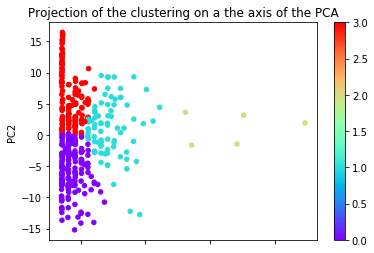

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=y_kmeans, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

# for x, y, label in zip(data_reduced[0], data_reduced[1], kmeans.labels_):
#     ax.annotate('Cluster {0}'.format(label), (x,y))

### Let's try to find the best K. 

Elbow or "Scree" method. https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

In [34]:
Ks = range(2, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]

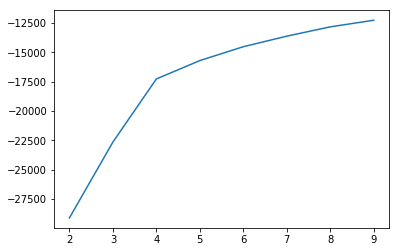

In [35]:
plt.plot(Ks, score)

For n_clusters = 2 The average silhouette_score is : 0.37321693127211486
For n_clusters = 3 The average silhouette_score is : 0.2639465193014291
For n_clusters = 4 The average silhouette_score is : 0.28242328154010454
For n_clusters = 5 The average silhouette_score is : 0.25453809169622016
For n_clusters = 6 The average silhouette_score is : 0.24724169530280604


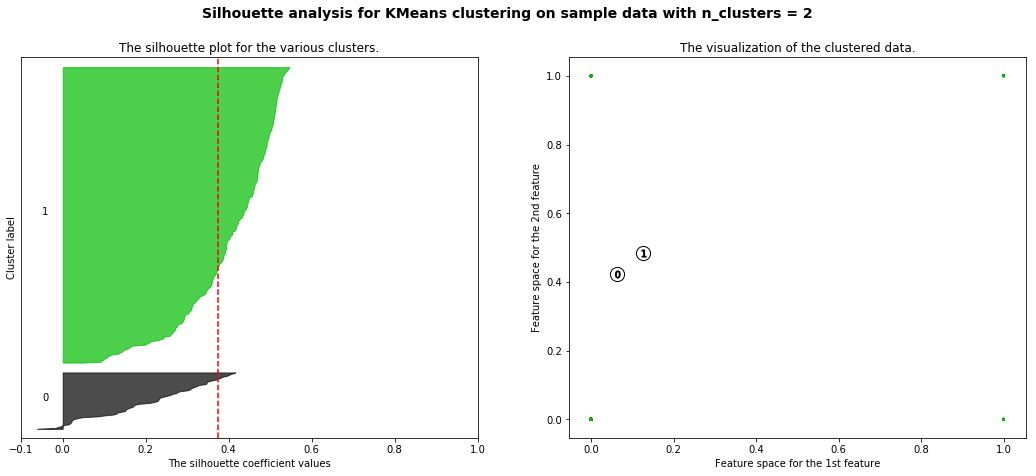

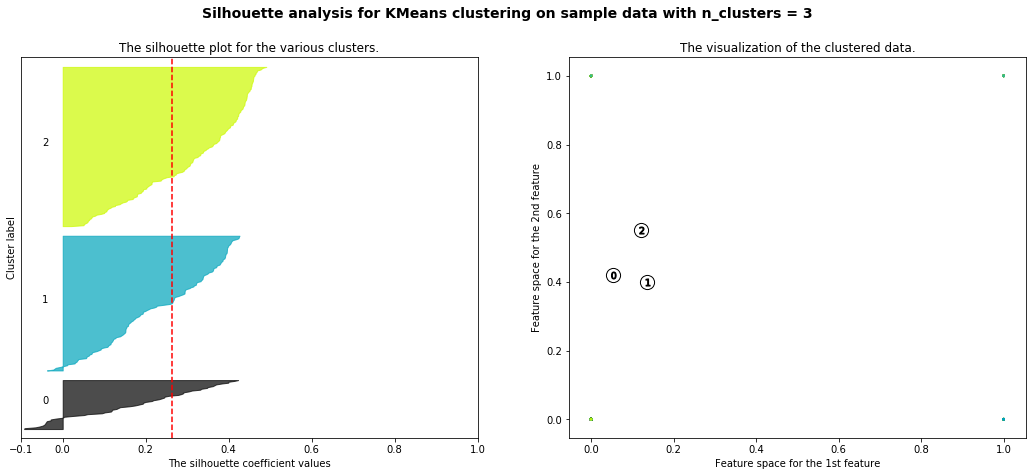

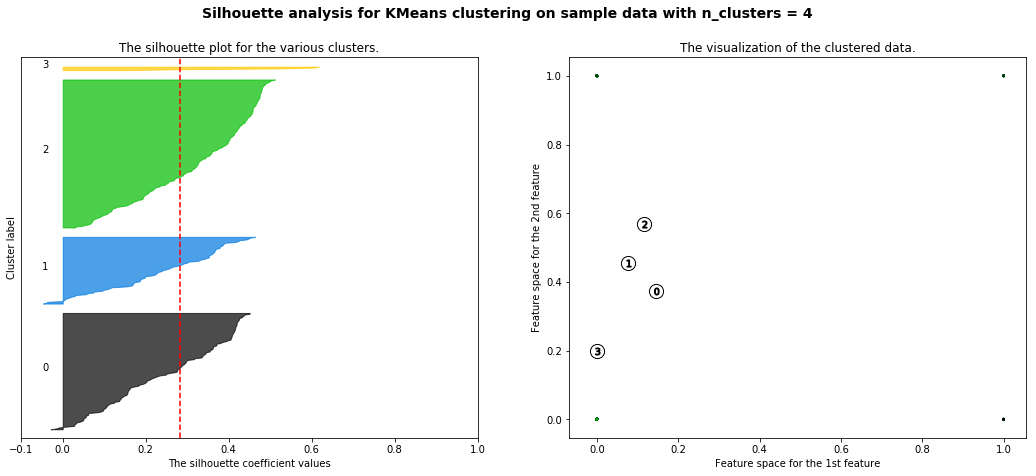

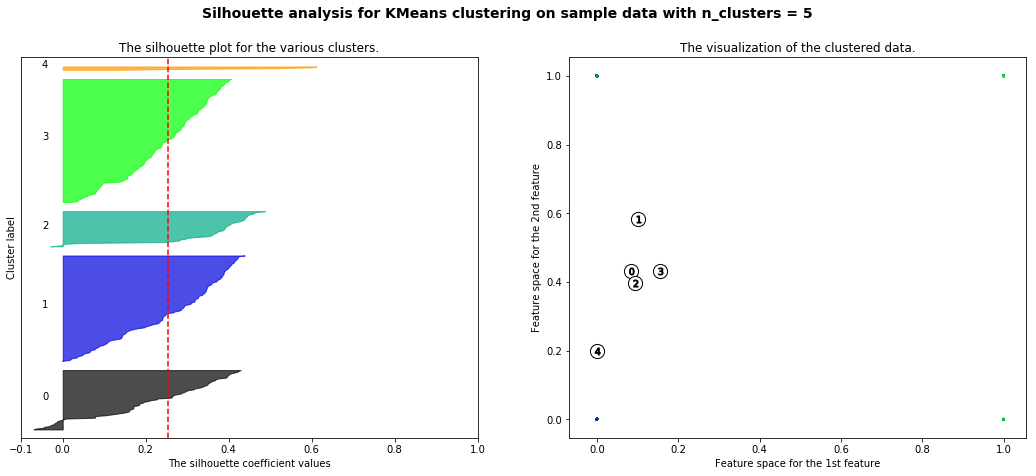

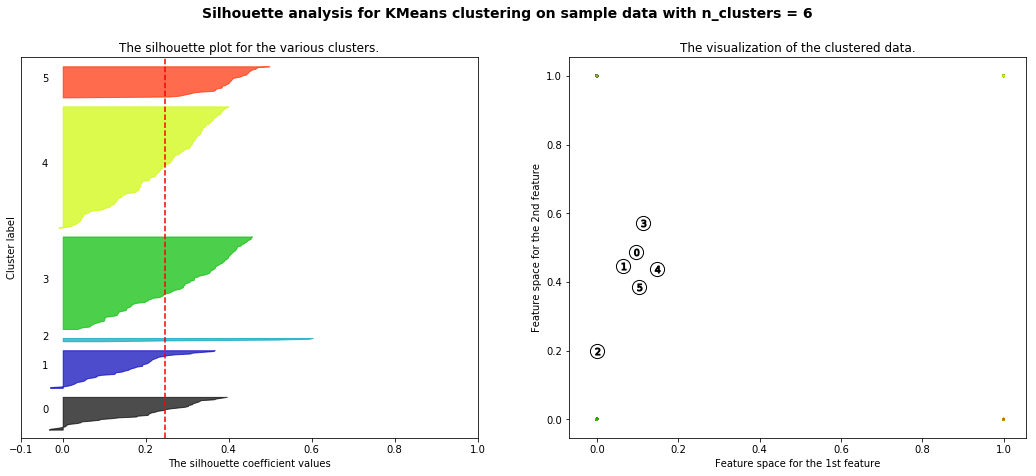

In [21]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### I wonder how all that would change if we used a Random Forest to choose features?

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [26]:
X = df
y = df.pop('G3').values

In [27]:
y.shape

(395,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
features = list(df.columns)

In [30]:
features

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [31]:
for mtry in range(2,len(features)+1):
    rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features=mtry, random_state=42)
    model= rfr.fit(X_train[features], y_train)
    preds = model.predict(X_test)
    print(f'{mtry}  {model.score(X_test, y_test)*100:.2f}%')

2  57.63%
3  69.67%
4  76.41%
5  78.96%
6  80.06%
7  80.99%
8  80.12%
9  82.10%
10  83.04%
11  82.39%
12  82.77%
13  82.04%
14  83.05%
15  82.54%
16  83.01%
17  83.18%
18  82.74%
19  83.20%
20  82.56%
21  82.51%
22  83.04%
23  82.86%
24  82.28%
25  82.89%
26  82.33%
27  81.86%
28  82.15%
29  81.78%
30  81.55%
31  82.15%
32  81.83%


Looks like 19 is our number. Now let's find the feature ranking.

In [32]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features=19, random_state=42)
model= rfr.fit(X_train[features], y_train)
preds = model.predict(X_test)

In [33]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]*100:.2f}%)" )


Feature ranking:
1. feature G2 (61.34%)
2. feature G1 (15.75%)
3. feature absences (9.49%)
4. feature failures (2.25%)
5. feature reason (1.78%)
6. feature age (1.13%)
7. feature health (0.69%)
8. feature goout (0.61%)
9. feature famrel (0.57%)
10. feature romantic (0.55%)
11. feature guardian (0.52%)
12. feature Mjob (0.49%)
13. feature studytime (0.48%)
14. feature Walc (0.48%)
15. feature Fjob (0.42%)
16. feature schoolsup (0.41%)
17. feature activities (0.40%)
18. feature Medu (0.36%)
19. feature Fedu (0.33%)
20. feature traveltime (0.29%)
21. feature freetime (0.22%)
22. feature paid (0.18%)
23. feature Dalc (0.17%)
24. feature sex (0.16%)
25. feature famsize (0.15%)
26. feature famsup (0.15%)
27. feature school (0.14%)
28. feature higher (0.14%)
29. feature nursery (0.11%)
30. feature internet (0.09%)
31. feature Pstatus (0.08%)
32. feature address (0.06%)
